# Análisis tweets 100 argentinos dicen

#### Extracción de datasets

Se extrajeron 5 datasets de tweets para analizar:<br>

<ol><li>Cuenta de <a href="https://twitter.com/dariobarassi">Dario Barassi</a></li>
<li>Cuenta oficial <a href="https://twitter.com/100argdicen">100 argentinos dicen</a></li>
<li>Todos las mediciones de rating publicadas por <a href="https://twitter.com/YoAmoAlTrece">@YoAmoAlTrece</a></li>
<li>Todos los tweets con mencion a 100 argentinos dicen (hasta el 6 de febrero de 2021)</li>
<li>Todos los tweets con mencion a 100 argentinos dicen (antes del 6 de febrero de 2021)</li>
    </ol>
    <br>

Los datasets se extrajeron con el entorno de <a href="https://github.com/twintproject/twint/wiki/Basic-usage">Twint</a> con las siguientes lineas. (copiar lineas y pegar en la consola) 

In [ ]:
# Cuenta de barassi
# Vamos a extraer a partir del 2019 ya que no queremos hhacer un analisis detallado sino una comparación antes 
# y despues de los ultimos dos años
twint -u dariobarassi --since 2019-01-01 -ho -o dariobarassi.csv --csv --count
#agrego el count para luego de terminar la extracción contabilizar cuantos tweets extraje

In [ ]:
#Cuenta oficial del programa
twint -u 100argdicen -ho -o cuenta100argdicen.csv --csv --count

In [ ]:
#Todos las mediciones de rating publicadas por @YoAmoAlTrece
twint -u yoamoaltrece -s #100argentinosdicen -ho -o rating100argdicen.csv --csv --count
# de la cuenta se extraen solo los tweets donde se nombra al programa(siempre usan el hashtags, utilizo esta pagina porque
# es bastante metodica y tiene varios años)

In [ ]:
#Todos los tweets con mencion a 100 argentinos dicen (hasta el 6 de febrero de 2021)
twint -s "100 argentinos dicen" -ho -o prueba100arg.csv --csv --count 
#por alguna razon esta linea que debería extraer todo junto solo extrae hasta el 2 de febrero de 2021 por lo que agregue
#una segunda extracción para todos los tweets anteriores
twint -s "100 argentinos dicen" --until 2021-02-06 -ho -o prueba100arg2.csv --csv --count

<b>Se extrajeron:</b>
<li>1500 tweets aprox  de la cuenta de Barassi
<li>170 aprox de la cuenta del programa
<li>250 aprox de los ratings
<li>35mil aprox de la primera consulta de mención 
<li>y 35 mil aprox de la segunda</li>
<br>
<b>Todos los tweets fueron guardados en documentos csv para analizarlos</b>

#### Importación librerias

importamos librerias para el análisis de los datos

In [1]:
from datetime import date, datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Creamos los dataframes

creamos e instanciamos los dataframe de pandas para poder trabajar con ellos.<br>
Vamos a trabajar con cada dataframe por separado y para eso necesitamos "abrir los archivos"

In [2]:
#lee el archivo creado e instancia el dataframe en una variable inicial
df_barassi = pd.read_csv("dariobarassi.csv", delimiter='\t', dtype={'name': object})
                # nombre archivo , delimitador, tipos de datos dificles de reconocer
df_100oficial = pd.read_csv("cuenta100argdicen.csv", delimiter='\t', dtype={'name': object})
df_rating = pd.read_csv("rating100argdicen.csv", delimiter='\t', dtype={'name': object})
df_m_1 = pd.read_csv("prueba100arg.csv", delimiter='\t', dtype={'name': object})
df_m_2 = pd.read_csv("prueba100arg2.csv", delimiter='\t', dtype={'name': object})

E:\Programas\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


aqui mostramos la información del primer dataframe completo

In [ ]:
df_m_2.info()

luego podemos revisar las primeras lineas de dataframe para visualizar un poco la información

In [ ]:
df_barassi.head()

#### Limpieza de datos

Despues de analizar vemos que debido a como se extraen los tweets por la aplicación de twint en cada dataframe hay varias columnas que no vamos a utilizar o que nos agregan poca información por lo que vamos a descartarlas(se borran de las variables no de los archivos originales)
<br>
<li><b>created_at </b> (la extraccion con twint extrae fecha y hora pero transformando el horario al de nuestra locación, ademas esta columna es un string por lo que no podemos graficar con ella, usaremos "date" y "time") 
<li><b>timezone</b> (al igual que la anterior siempre va a ser la timezone de la extracción por lo que siempre es igual)
<li><b>name</b>(el name es el nombre visual, no el arroba por lo que no es tan util y ademas contiene emojis lo que nos dificulta trabajar con ellos)
<li><b>place</b> (nos indica con coordenadas desde donde fue realizado un tweet, de 35mil tweets solo tenemos 5 valores por lo que no es relevante)
<li><b>language</b> (twitter tiene suele tener muchos problemas de reconocimientos de lenguajes, tomando en cuenta el tema vamos a tratar a todos los tweets como español)
<li><b>cashtags</b> (son hastags pero para monedas digitales, no nos interesa)
<li><b>retweet</b>(este tipo de busqueda no extrae retweets)
<li><b>near</b> (columna vacía)             
<li><b>geo  </b>   (columna vacía)             
<li><b>source </b>        (columna vacía)      
<li><b>user_rt_id </b>      (columna vacía)    
<li><b>retweet_id </b>    (columna vacía)      
<li><b>user_rt    </b>      (columna vacía)    
<li><b>retweet_date</b>     (columna vacía)    
<li><b>translate </b>       (columna vacía)    
<li><b>trans_src  </b>      (columna vacía)    
<li><b>trans_dest </b>     (columna vacía)    

In [3]:
#aqui vamos a borrar las columnas demás
df_barassi = df_barassi.drop(columns=["created_at","timezone","name","place","language","cashtags","retweet","near","geo","source","user_rt_id","retweet_id","user_rt","retweet_date","translate","trans_src","trans_dest"])
df_100oficial = df_100oficial.drop(columns=["created_at","timezone","name","place","language","cashtags","retweet","near","geo","source","user_rt_id","retweet_id","user_rt","retweet_date","translate","trans_src","trans_dest"])
df_rating = df_rating.drop(columns=["created_at","timezone","name","place","language","cashtags","retweet","near","geo","source","user_rt_id","retweet_id","user_rt","retweet_date","translate","trans_src","trans_dest"])
df_m_1 = df_m_1.drop(columns=["created_at","timezone","name","place","language","cashtags","retweet","near","geo","source","user_rt_id","retweet_id","user_rt","retweet_date","translate","trans_src","trans_dest"])
df_m_2 = df_m_2.drop(columns=["created_at","timezone","name","place","language","cashtags","retweet","near","geo","source","user_rt_id","retweet_id","user_rt","retweet_date","translate","trans_src","trans_dest"])



In [ ]:
df_m_2.info()

######  convertir fechas
ahora precisamos unir la columna de date y tiempo para generar una columna que podamos convertir en tipo datetime y generar graficas

In [4]:
def formato_tiempo(tiempo):
    tiempo_out= pd.to_timedelta(tiempo)
    return tiempo_out
df_barassi["time"] = df_barassi["time"].apply(formato_tiempo)
df_100oficial["time"] = df_100oficial["time"].apply(formato_tiempo)
df_rating["time"] = df_rating["time"].apply(pd.to_timedelta)
df_m_1["time"] = df_m_1["time"].apply(formato_tiempo)
df_m_2["time"] = df_m_2["time"].apply(formato_tiempo)

In [11]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               265 non-null    int64          
 1   conversation_id  265 non-null    int64          
 2   date             265 non-null    object         
 3   time             265 non-null    timedelta64[ns]
 4   user_id          265 non-null    int64          
 5   username         265 non-null    object         
 6   tweet            265 non-null    object         
 7   mentions         265 non-null    object         
 8   urls             265 non-null    object         
 9   photos           265 non-null    object         
 10  replies_count    265 non-null    int64          
 11  retweets_count   265 non-null    int64          
 12  likes_count      265 non-null    int64          
 13  hashtags         265 non-null    object         
 14  link             265 non-n

In [5]:
def formato_fecha(fecha):
    fecha_out= pd.to_datetime(fecha, infer_datetime_format=True)
    return fecha_out

df_barassi["date"] = df_barassi["date"].apply(formato_fecha)
df_100oficial["date"] = df_100oficial["date"].apply(formato_fecha)

df_rating["date"] = df_rating["date"].apply(formato_fecha)

df_m_1["date"] = df_m_1["date"].apply(formato_fecha)
df_m_2["date"] = df_m_2["date"].apply(formato_fecha)


In [13]:
df_m_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45268 entries, 0 to 45267
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               45268 non-null  int64          
 1   conversation_id  45268 non-null  int64          
 2   date             45268 non-null  datetime64[ns] 
 3   time             45268 non-null  timedelta64[ns]
 4   user_id          45268 non-null  int64          
 5   username         45268 non-null  object         
 6   tweet            45268 non-null  object         
 7   mentions         45268 non-null  object         
 8   urls             45268 non-null  object         
 9   photos           45268 non-null  object         
 10  replies_count    45268 non-null  int64          
 11  retweets_count   45268 non-null  int64          
 12  likes_count      45268 non-null  int64          
 13  hashtags         45268 non-null  object         
 14  link             45268

## Grafica de ratings

In [6]:
#ratings
df_rating=df_rating[df_rating["tweet"].str.startswith("#Ratings")]
df_rating=df_rating[["id","tweet","date","time"]]
#df_rating.to_excel('df_rating.xlsx')
df_rating

,id,tweet,date,time
0,1437771398320205826,#Ratings #eltrece 13/9: #ArribaArg 2.5⬇️ #Nos...,2021-09-14,0 days 10:33:08
2,1435601211680505860,#Ratings #eltrece 7/9: #ArribaArg 2.3⬇️ #Noso...,2021-09-08,0 days 10:49:35
4,1435236693104283650,#Ratings #eltrece 6/9: #ArribaArg 2.5⬇️ #Noso...,2021-09-07,0 days 10:41:07
5,1434871340645949442,#Ratings #eltrece 5/9 》 #Carburando2 1.6 #Los...,2021-09-06,0 days 10:29:20
6,1434167039254482950,#Ratings #eltrece 3/9: #ArribaArg 2.8⬆️ #Noso...,2021-09-04,0 days 11:50:42
...,...,...,...,...
251,1299743718208081924,#Ratings #eltrece 28/8: #ArribaArg 1.9 ⬇️ #No...,2020-08-29,0 days 13:20:25
252,1299362784677949440,#Ratings #eltrece 27/8: #ArribaArg 2.1 ⬆️ #No...,2020-08-28,0 days 12:06:43
253,1298982864449503232,#Ratings #eltrece 26/8: #ArribaArg 1.8 ⬇️ #No...,2020-08-27,0 days 10:57:03
254,1298638271602466816,#Ratings #eltrece 25/8: #ArribaArg 2.0 ⬆️ #No...,2020-08-26,0 days 12:07:46


In [7]:
import re

def limpiar_rating (Texto):
    Texto = re.search("#100ArgentinosDicen ...", Texto)
    Texto= Texto.group(0)
    Texto= re.sub("#100ArgentinosDicen","", Texto)
    
    return Texto


df_rating["rating"]=df_rating["tweet"].apply(limpiar_rating)
df_rating["rating"]=df_rating["rating"].astype("float")

In [ ]:
df_rating

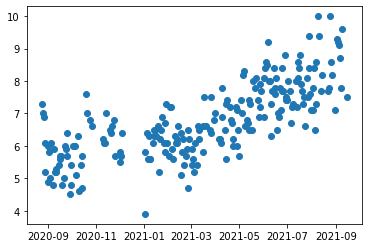

In [8]:
df_rating_plt= df_rating[["date","rating"]]
plt.plot_date(df_rating_plt["date"],df_rating_plt["rating"])


<AxesSubplot:xlabel='Fechas'>

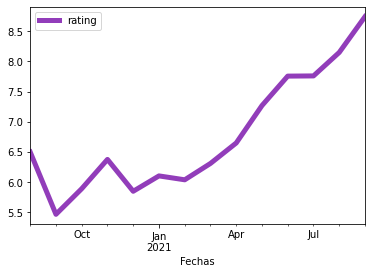

In [49]:
df_rating_plt_m=df_rating_plt.groupby(pd.Grouper(key='date', axis=0, 
                      freq='M',)).mean()
df_rating_plt_m.plot(linewidth = '5.0', xlabel="Fechas",label="Disparó el Rating",legend="Rating",color = '#7103A5C4')

## Grafica Barasi likes y actividad

<AxesSubplot:xlabel='Fecha', ylabel='Cantidad Tweets'>

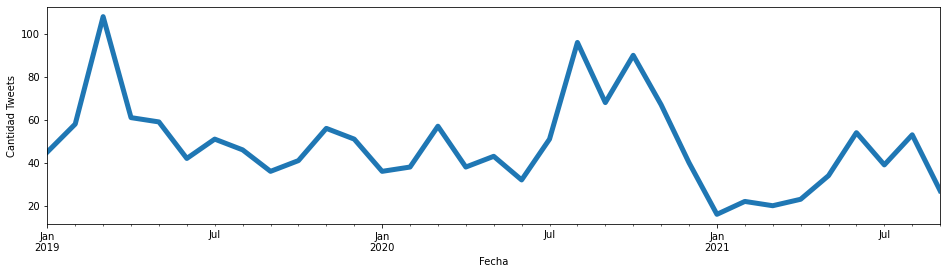

In [10]:
#grafica de actividad mensual
df_barassi
df_act_barassi = df_barassi[["date","tweet"]].groupby(pd.Grouper(key='date', axis=0, 
                      freq='M',)).count()
df_act_barassi.plot(figsize=(16, 4), xlabel="Fecha",linewidth = '5.0', ylabel="Cantidad Tweets", label="Actividad mensual", legend=False)

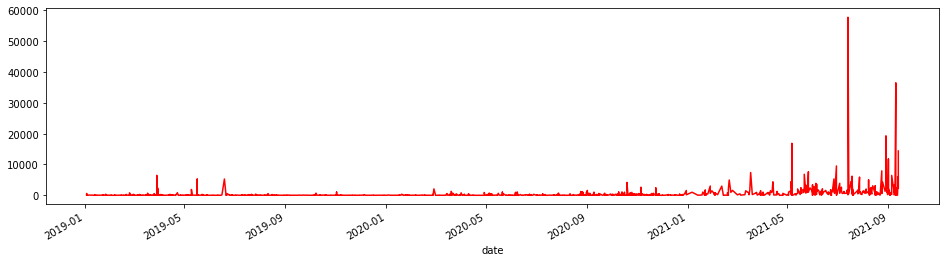

In [19]:
#plt cantidad de likes recibidos
time_favs_barassi = pd.Series(data=df_barassi['likes_count'].values, index=df_barassi['date'])
time_favs_barassi.plot(figsize=(16, 4), color='r')
plt.show()

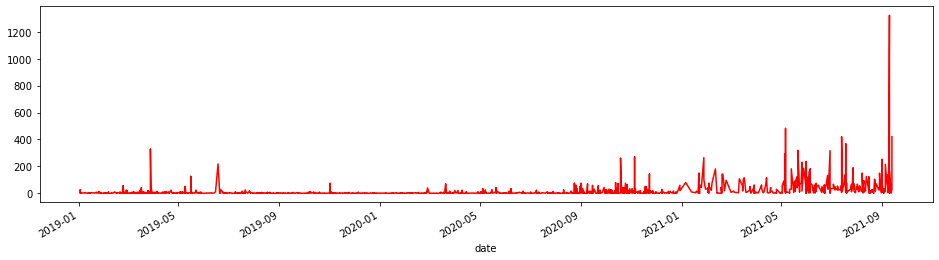

In [20]:
#plt cantidad de replies_count
time_favs_barassi = pd.Series(data=df_barassi['replies_count'].values, index=df_barassi['date'])
time_favs_barassi.plot(figsize=(16, 4), color='r')
plt.show()

In [12]:
df_barassi["likes_count"].max()

57711

In [19]:
df_barassi[(df_barassi["likes_count"] == 57711)]

,id,conversation_id,date,time,user_id,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
103,1415448296966041606,1415448296966041606,2021-07-14,0 days 20:09:06,174345178,dariobarassi,Xq vos toda producida @lalioficial al rojo 🔥🔥🔥...,"[{'screen_name': 'lalioficial', 'name': 'lali'...",[],[],421,1562,57711,[],https://twitter.com/dariobarassi/status/141544...,https://twitter.com/RatingLucca/status/1415434...,0,NaN,[]


## Grafica likes cuenta oficial 100 arg

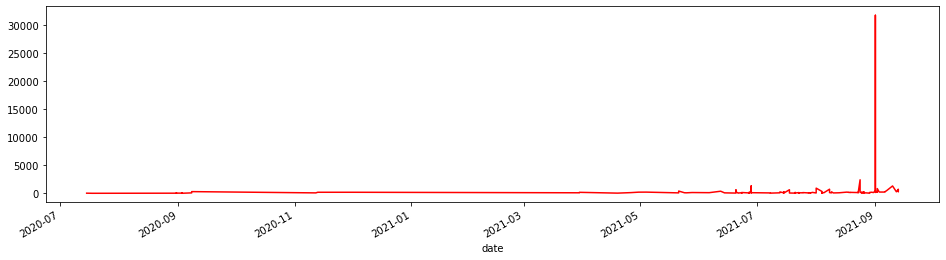

In [21]:
#plt cantidad de likes recibidos
time_favs_o_100arg = pd.Series(data=df_100oficial['likes_count'].values, index=df_100oficial['date'])
time_favs_o_100arg.plot(figsize=(16, 4), color='r')
plt.show()

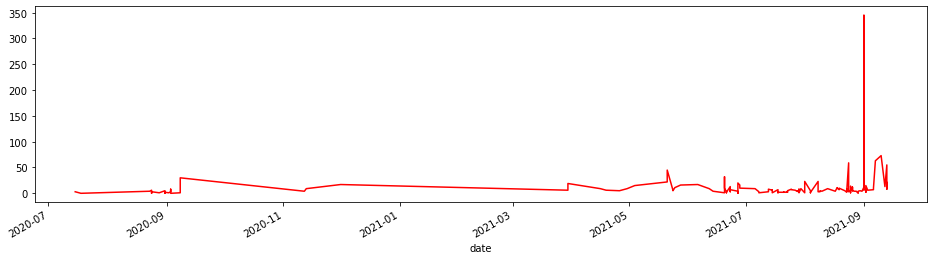

In [22]:
#plt cantidad de replies_count
time_favs_o_100arg = pd.Series(data=df_100oficial['replies_count'].values, index=df_100oficial['date'])
time_favs_o_100arg.plot(figsize=(16, 4), color='r')
plt.show()

In [20]:
df_100oficial["likes_count"].max()

31674

In [21]:
df_100oficial[df_100oficial["likes_count"] == df_100oficial["likes_count"].max()]

,id,conversation_id,date,time,user_id,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
13,1433134936681222148,1433134936681222148,2021-09-01,0 days 15:29:29,1278853300750876674,100argdicen,La particular risa de esta participante asustó...,[],[],[],345,3137,31674,['100argentinosdicen'],https://twitter.com/100argdicen/status/1433134...,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/14331...,[]


## limpiar bots dataframes grandes

In [22]:
df_m_1["hashtags"] = df_m_1["hashtags"].apply(eval)
df_m_2["hashtags"] = df_m_2["hashtags"].apply(eval)

In [ ]:
df_m_1.shape

In [ ]:
df_m_2.shape

In [ ]:
df_m_prueba=df_m_1[df_m_1["date"] > pd.Timestamp("2021-09-15")]
df_m_prueba

In [23]:
def len_hashtags (hashta):
    len_hashta=len(hashta)
    return len_hashta






In [24]:
df_m_1["len_hashtags"]=df_m_1["hashtags"].apply(len_hashtags)
df_m_1=df_m_1[df_m_1["len_hashtags"] <= 4]
df_m_1.shape

(36109, 20)

In [ ]:
df_m_1

In [25]:
df_m_2["len_hashtags"]=df_m_2["hashtags"].apply(len_hashtags)
df_m_2=df_m_2[df_m_2["len_hashtags"] <= 4]
df_m_2.shape

(39769, 20)

## ahora si, unimos los dos dataframes

In [27]:
df_menciones=pd.concat([df_m_1,df_m_2])
df_menciones.shape

(75878, 20)

In [29]:
df_menciones_conteo= df_menciones["id"].size
df_menciones_conteo

75878

([<matplotlib.patches.Wedge at 0x1df5df0a2b0>,
 [Text(1.1860731136408507, 0.5321941084776287, 'Tweets con Memes :)'),
  Text(-1.0036003269268736, -0.45031809178876264, 'Tweets sin memes :(')])

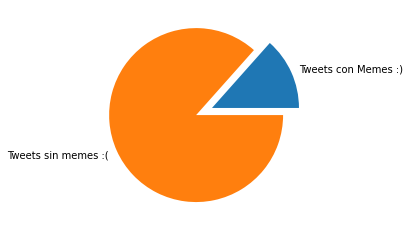

In [30]:
#grafica tweets que tienen memes? 
cantidad_memes=df_menciones[(df_menciones["photos"].str.startswith("[]") == False) | (df_menciones["video"] == 1)].id.size
cantidad_no_memes= df_menciones_conteo - cantidad_memes
cantidad_memes_j=[cantidad_memes, cantidad_no_memes]
leyendas=["Tweets con Memes :)", "Tweets sin memes :("]
explosion = [0.2, 0]
plt.pie(cantidad_memes_j, labels = leyendas, explode = explosion)



([<matplotlib.patches.Wedge at 0x1df5fc0b1f0>,
 [Text(-0.757285774252692, 1.0566542746397714, 'Tweets que usan el hashtag :)'),
  Text(0.6407803542324477, -0.8940920185471622, 'Tweets que no usan el hashtag :(')])

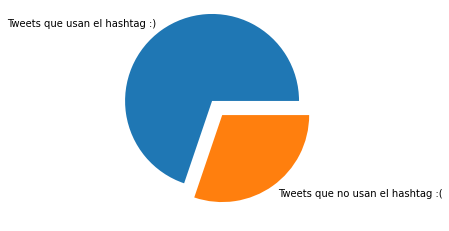

In [31]:
#cantidad de tweets con hashtag 100argentinos dicen
df_hashtag=df_menciones[df_menciones["tweet"].str.contains("#100ArgentinosDicen")]


#grafica tweets que usan el hashtag
cantidad_hashtag=df_hashtag["id"].size
cantidad_no_hashtag= df_menciones_conteo - cantidad_hashtag
cantidad_hashtag_j=np.array([cantidad_hashtag, cantidad_no_hashtag])
leyendas=["Tweets que usan el hashtag :)", "Tweets que no usan el hashtag :("]
explosion = [0.2, 0]
plt.pie(cantidad_hashtag_j, labels = leyendas, explode = explosion)

<AxesSubplot:xlabel='Fecha', ylabel='Cantidad Tweets'>

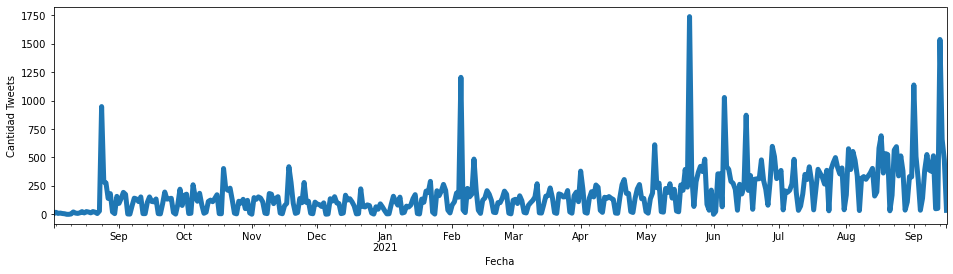

In [44]:
#grafica de actividad dia
df_menciones_act = df_menciones[df_menciones["date"].dt.date > pd.Timestamp("2020-08-1 00:00:01")]
df_menciones_act_dia = df_menciones_act[["date","tweet"]].groupby(pd.Grouper(key='date', axis=0, 
                      freq='D',)).count()
df_menciones_act_dia.plot(figsize=(16, 4), xlabel="Fecha",linewidth = '5.0', ylabel="Cantidad Tweets", label="Actividad por día", legend=False)

<AxesSubplot:xlabel='Fecha', ylabel='Cantidad Tweets'>

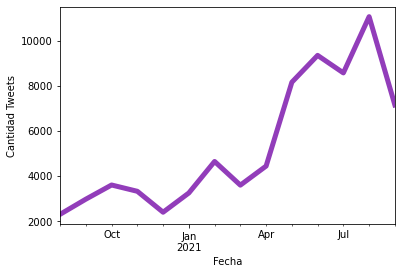

In [52]:
#grafica de actividad mensual 

df_menciones_act_m = df_menciones_act[["date","tweet"]].groupby(pd.Grouper(key='date', axis=0, 
                      freq='M',)).count()
df_menciones_act_m.plot( xlabel="Fecha",linewidth = '5.0', ylabel="Cantidad Tweets", label="Actividad mensual", legend=False, color = '#7103A5C4')

<AxesSubplot:xlabel='Horas de Mayor Actividad', ylabel='Cantidad de Tweets'>

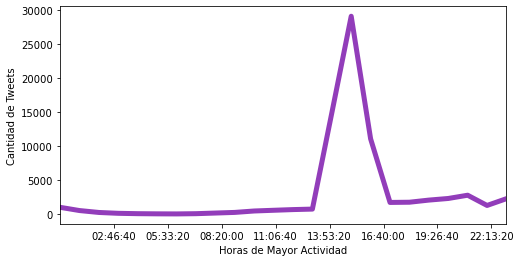

In [61]:
#grafica actividad menciones horas
df_menciones_act_h = df_menciones_act[["time","tweet"]].groupby(pd.Grouper(key='time', axis=0, 
                      freq='H',)).count()
df_menciones_act_h.plot(figsize=(8, 4), xlabel="Horas de Mayor Actividad",linewidth = '5.0', ylabel="Cantidad de Tweets", label="Actividad por hora", legend=False, color = '#7103A5C4')

###### grafica google busquedas del programa

In [42]:
df_menciones_act_dia[df_menciones_act_dia["tweet"] > 750]

,tweet
date,
2020-08-24,948
2021-02-05,1205
2021-05-21,1739
2021-06-06,1028
2021-06-16,872
2021-09-01,1138
2021-09-13,1538


In [55]:
df_menciones_act[df_menciones_act["likes_count"] == df_menciones_act["likes_count"].max()]

,id,conversation_id,date,time,user_id,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to,len_hashtags
15056,1426273105597640705,1426273105597640705,2021-08-13,0 days 17:03:01,973302847654760448,porquetendencia,"""Barassi"": Por su cruce con un participante de...",[],[],[],1369,7916,113637,[100argentinosdicen],https://twitter.com/porquetendencia/status/142...,NaN,1,https://pbs.twimg.com/amplify_video_thumb/1426...,[],1
